# Data Science Research Methods


## Andreas Kyratzis
## Assignment 1

### Contents

#### 1.Data Cleaning
#### 2.Data Correlation
#### 3.Exploratory Data Analysis
#### 4.Hypothesis Testing
#### 5.Decisions

**Outline:** This assignment is based on real world data and data analytics that is to be used to determine how a production company; SussexBudgetProductions is going to use £500000 to produce a movie that will be profitable. 

In [3]:
#Initialisation of all library uses required
import math
import operator
import functools
import numpy as np
from matplotlib import pyplot as pypl
import pandas as pd
import scipy as sc
from scipy import stats
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

rawData = 'movie_metadata.csv'

#Read data from csv file
df = pd.read_csv(rawData,index_col = None)

### 1.Data cleaning


Data cleaning consists of a strategy of taking a very careful look at the data to be used and examining patterns at first glance. First and foremost the first examination shows that there are 5043 entries to the dataset. 

#### Missing values

First off we need to see whether there are any missing values in any of our columns which will determine if we need to fill in any data before working with the dataset

In [4]:
df.isnull().sum().sort_values(ascending = False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          21
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
movie_facebook_likes           0
genres                         0
movie_title                    0
num_voted_users                0
movie_imdb_link                0
imdb_score                     0
cast_total_facebook_likes      0
dtype: int64

##### Missing values of significance

**'gross'** <br>
As it can be seen, 'gross' is the column that has the most of its data missing with 884 fields having no values which is 17.5% of all rows/records. There are a few practices that are used in situations like these such as deleting all the rows that have no values in 'gross' or since it is of numerical value; using the median or the mean of the column to fill all the empty spaces in the column. 

Using the median or mean for a column that is of so much importance to our analysis would have major consequences and implications while using 'gross' in our visualisations.

**'budget'** <br>
The same situation arises when we look at 'budget' as it also of big importance to our analysis and it has 492 missing fields which are a lot since it is 9.75% of all rows/records.

**Decision taken** <br>
The decision taken is to remove all rows/records where the 'gross' and/or 'budget' are missing since it is important to keep numerical values of significance unaltered. 

In [5]:
df = df[pd.notnull(df['budget'])]
df = df[pd.notnull(df['gross'])]
df.isnull().sum().sort_values(ascending = False)

aspect_ratio                 75
content_rating               51
plot_keywords                31
actor_3_facebook_likes       10
actor_3_name                 10
facenumber_in_poster          6
actor_2_name                  5
actor_2_facebook_likes        5
actor_1_facebook_likes        3
actor_1_name                  3
language                      3
color                         2
duration                      1
num_critic_for_reviews        1
genres                        0
director_facebook_likes       0
director_name                 0
gross                         0
movie_facebook_likes          0
movie_title                   0
num_voted_users               0
movie_imdb_link               0
num_user_for_reviews          0
country                       0
budget                        0
title_year                    0
imdb_score                    0
cast_total_facebook_likes     0
dtype: int64

##### Missing values of not much significance

In [6]:
df['aspect_ratio'].fillna(df['aspect_ratio'].mean(), inplace = True)
df['content_rating'].fillna('No Rating', inplace = True)
df['plot_keywords'].fillna('No keywords', inplace = True)
df['actor_3_facebook_likes'].fillna(df['actor_3_facebook_likes'].mean(), inplace = True)
df['actor_3_name'].fillna('Unknown actor', inplace = True)
df['facenumber_in_poster'].fillna(df['facenumber_in_poster'].mean(), inplace  = True)
df['actor_2_facebook_likes'].fillna(df['actor_2_facebook_likes'].mean(), inplace = True)
df['actor_2_name'].fillna('Unknown actor', inplace = True)
df['actor_1_name'].fillna('Unknown actor', inplace = True)
df['actor_1_facebook_likes'].fillna(df['actor_1_facebook_likes'].mean(), inplace = True)
df['language'].fillna('Unknown language', inplace = True)
df['color'].fillna('Color', inplace = True)
df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].mean(), inplace = True)
df['duration'].fillna(df['duration'].mean(),inplace = True)

#check if there any more missing values
df.isnull().values.any()

False

#### Duplicates

Now that we have no missing values in our dataset we can proceed with finding duplicates entries and removing them as not doing so would result in incorrect assumptions in our data analysis. We would only care about duplicates of movie titles which would mean that a movie was recorded twice or more time in the dataset therefore we look for duplicates of movie titles.

In [8]:
df = df.drop_duplicates(subset = ['movie_title','budget','gross'], keep = False)
df = df.dropna(subset = ['budget','gross'])

#### Add necessary data to the dataset

Further on, a column that calculates the profit of the movie has to be added in order to be used in  the calculations.

The 'profit' column will be produced by subtracting the **'budget'** from the **'gross'**

In [9]:
df['profit'] = df['gross'] - df['budget'] 

As we need all movies that have budget below £500000, we have to find those movies and use those movies in our hypothesis to get some reasonable outputs of how they performed.

In [10]:
movies500g = df[df['budget'] <= 500000].sort_values(by = 'budget', ascending = True)
movies500g

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
4799,Color,Jonathan Caouette,72.0,88.0,20.0,0.000000,Jonathan Caouette,58.0,592014.0,Biography|Documentary,...,English,USA,Unrated,218.0,2003.0,20.0,7.2,1.370000,754,591796.0
5042,Color,Jon Gunn,43.0,90.0,16.0,16.000000,Brian Herzlinger,86.0,85222.0,Documentary,...,English,USA,PG,1100.0,2004.0,23.0,6.6,1.850000,456,84122.0
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.000000,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,French,France,R,4500.0,2004.0,133.0,6.9,2.350000,171,131507.0
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.000000,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.370000,0,2033920.0
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.000000,Edgar Tancangco,0.0,70071.0,Thriller,...,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,2.109751,74,63071.0
5033,Color,Shane Carruth,143.0,77.0,291.0,8.000000,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.850000,19000,417760.0
5037,Color,Edward Burns,14.0,95.0,0.0,133.000000,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,2.109751,413,-4416.0
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.000000,Nargess Mamizadeh,5.0,673780.0,Drama,...,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.850000,697,663780.0
5025,Color,John Waters,73.0,108.0,0.0,105.000000,Mink Stole,462.0,180483.0,Comedy|Crime|Horror,...,English,USA,NC-17,10000.0,1972.0,143.0,6.1,1.370000,0,170483.0
4311,Color,Hunter Richards,34.0,92.0,11.0,1000.000000,Chris Evans,26000.0,12667.0,Drama|Romance,...,English,UK,R,14000.0,2005.0,11000.0,6.6,2.350000,0,-1333.0


As it can be seen there are only 131 movies that have a budget of  £500000 or less making it more difficult to make definite assumptions for future movies of that budget.

### 2.Data Correlation

Finding out the correlation between different columns of our dataset will help us with our exploratory data analysis by knowing which variables correlate with each other in order to analyse and examine patterns.

#### imdb_score - profit

In [11]:
spearman, p_value = stats.spearmanr(df["imdb_score"],df["profit"])
print('Spearmans rank correlation coefficient between IMDB score and the profit is %0.03f' % (spearman))
print('The p-value is %0.03f' % (p_value))

Spearmans rank correlation coefficient between IMDB score and the profit is 0.234
The p-value is 0.000


#### imdb_score - director_name

In [12]:
spearman, p_value = stats.spearmanr(df["imdb_score"],df["director_name"])
print('Spearmans rank correlation coefficient between IMDB score and the director is %0.03f' % (spearman))
print('The p-value is %0.03f' % (p_value))

Spearmans rank correlation coefficient between IMDB score and the director is 0.013
The p-value is 0.412


C:\Users\Andreas\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


#### profit - director_name

In [13]:
spearman, p_value = stats.spearmanr(df["profit"],df["director_name"])
print('Spearmans rank correlation coefficient between the profit and the director is %0.03f' % (spearman))
print('The p-value is %0.03f' % (p_value))

Spearmans rank correlation coefficient between the profit and the director is -0.028
The p-value is 0.092


C:\Users\Andreas\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


#### imdb_score - director_name

In [14]:
spearman, p_value = stats.spearmanr(df["imdb_score"],df["director_name"])
print('Spearmans rank correlation coefficient between the IMDB score and the director is %0.03f' % (spearman))
print('The p-value is %0.03f' % (p_value))

Spearmans rank correlation coefficient between the IMDB score and the director is 0.013
The p-value is 0.412


C:\Users\Andreas\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


#### profit - actor_1_name

In [15]:
spearman, p_value = stats.spearmanr(df["profit"],df["actor_1_name"])
print('Spearmans rank correlation coefficient between the profit and the main actor is %0.03f' % (spearman))
print('The p-value is %0.03f' % (p_value))

Spearmans rank correlation coefficient between the profit and the main actor is -0.005
The p-value is 0.773


C:\Users\Andreas\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


#### imdb_score - actor_1_name

In [16]:
spearman, p_value = stats.spearmanr(df["imdb_score"],df["actor_1_name"])
print('Spearmans rank correlation coefficient between the IMDB score and the main actor is %0.03f' % (spearman))
print('The p-value is %0.03f' % (p_value))

Spearmans rank correlation coefficient between the IMDB score and the main actor is 0.034
The p-value is 0.037


C:\Users\Andreas\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


#### imdb_score - genres

In [17]:
spearman, p_value = stats.spearmanr(df["imdb_score"],df["genres"])
print('Spearmans rank correlation coefficient between the IMDB score and the genres of the movie is %0.03f' % (spearman))
print('The p-value is %0.03f' % (p_value))

Spearmans rank correlation coefficient between the IMDB score and the genres of the movie is 0.074
The p-value is 0.000


C:\Users\Andreas\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


#### profit - genres

In [18]:
spearman, p_value = stats.spearmanr(df["profit"],df["genres"])
print('Spearmans rank correlation coefficient between the profit and the genres of the movie is %0.03f' % (spearman))
print('The p-value is %0.03f' % (p_value))

Spearmans rank correlation coefficient between the profit and the genres of the movie is 0.065
The p-value is 0.000


C:\Users\Andreas\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


#### Results of Correlations

As it can be seen from the correlation calculations carried out using numerical and categorial data, **imdb_score** is positively correlated with **director_name** and **actor_1_name**. Furthermore positive correlations also occur with **imdb_score** and **profit**.

Since the above examples produce posivite correlations, the columns associated will be used in our Exploratory Data Analysis. 

### 3.Exploratory Data Analysis

**'genres'**

It would be wise to start our analysis based on **'genres'** as it is of most value when considering that not all actors or directors do all genres of movies. Therefore we first need to find the most profitable genres, working with the column **'profit'**, on movies within our budget.

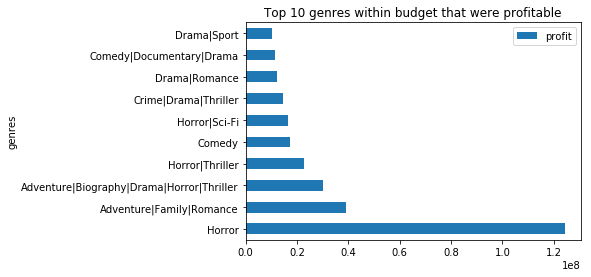

In [19]:
movies500gProfitable = movies500g.loc[(movies500g['profit']>0)]

profitableGenres = movies500gProfitable.loc[:,['genres','profit']].groupby('genres')
profitableGenres = profitableGenres.mean()
profitableGenres = profitableGenres.sort_values(by = 'profit',ascending = False)
profitableGenres.head(10).plot(kind = 'barh', title = 'Top 10 genres within budget that were profitable')

Now that we know that **horror** is the most profitable genre, we need to examine how many horror movies are within our budget that were profitable.

In [20]:
movies500gProfitable = movies500g.loc[(movies500g['profit']>0)]
horror500g = movies500gProfitable[movies500gProfitable['genres'].str.contains("Horror")]
horror500g

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
5025,Color,John Waters,73.0,108.0,0.0,105.0,Mink Stole,462.0,180483.0,Comedy|Crime|Horror,...,English,USA,NC-17,10000.0,1972.0,143.0,6.1,1.37,0,170483.0
4793,Color,Oren Peli,409.0,84.0,110.0,21.0,Ashley Palmer,189.0,107917283.0,Horror,...,English,USA,R,15000.0,2007.0,109.0,6.3,1.85,12000,107902283.0
4962,Black and White,Larry Blamire,88.0,90.0,56.0,56.0,Brian Howe,126.0,110536.0,Comedy|Horror|Sci-Fi,...,English,USA,PG,40000.0,2001.0,76.0,7.0,1.85,0,70536.0
4707,Black and White,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,...,English,USA,R,60000.0,1999.0,170.0,6.4,1.33,0,140470114.0
4956,Color,Travis Cluff,159.0,81.0,3.0,7.0,Cassidy Gifford,220.0,22757819.0,Horror|Thriller,...,English,USA,R,100000.0,2015.0,40.0,4.2,1.85,0,22657819.0
4893,Black and White,Eugène Lourié,67.0,80.0,7.0,21.0,Cecil Kellaway,57.0,5000000.0,Adventure|Horror|Sci-Fi,...,English,USA,Approved,210000.0,1953.0,40.0,6.7,1.37,465,4790000.0
4726,Color,Chris Kentis,235.0,79.0,9.0,7.0,Saul Stein,48.0,30500882.0,Adventure|Biography|Drama|Horror|Thriller,...,English,USA,R,500000.0,2003.0,10.0,5.7,1.85,0,30000882.0
4728,Color,John 'Bud' Cardos,95.0,97.0,8.0,22.0,Hoke Howell,423.0,17000000.0,Horror|Sci-Fi,...,English,USA,PG,500000.0,1977.0,23.0,5.9,1.85,0,16500000.0


There are 8 movies produced that have genre **horror** and have had budget of £500000 or lower that had a profitable return. Even though this is a small number considering our total entries of 5043, it can be said that **horror** is the best genre for our budget.

#### 'director_name'

By using our analysis on genres above, we can move on on selecting a director which could produce a horror movie within our budget.

In [21]:
horror500g.groupby('director_name')['profit'].count().sort_values(ascending = False).head(10)

director_name
Travis Cluff         1
Oren Peli            1
Larry Blamire        1
John Waters          1
John 'Bud' Cardos    1
Eugène Lourié        1
Daniel Myrick        1
Chris Kentis         1
Name: profit, dtype: int64

The directors that have previous experience in horror movies within our budget with a profitable return on their movies are shown above. All have 1 movie each therefore it is difficult to decide which director is best fit without more analysis. 

To analyse further we need to look at these director's imdb scores on their movies.

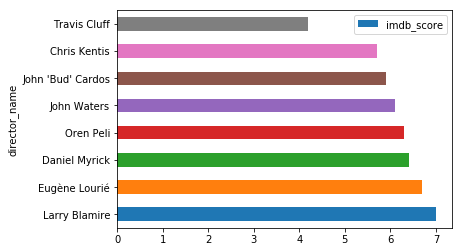

In [23]:
directorsHorror500 = horror500g.sort_values(by = 'imdb_score', ascending = False)
directorsHorror500.plot(x = 'director_name',y = 'imdb_score', kind = 'barh') 

We can also analyse our directors based on their facebook likes which will give us better insights.

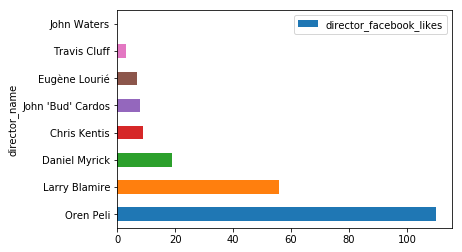

In [24]:
directorsHorror500 = horror500g.sort_values(by = 'director_facebook_likes', ascending = False)
directorsHorror500.plot(x = 'director_name', y = 'director_facebook_likes', kind = 'barh') 

The best directors for a horror movie as of IMDB scores and Facebook likes are **Larry Blamire** and **Oren Peli** with the second having way more interactions with fans as he is well percieved on Facebook.

#### 'actor_1_name'

To get to know the best actors we have to look at their returns in profit as the movie to be produced has to be well profitable.

In [25]:
horror500g.groupby('actor_1_name')['profit'].count().sort_values(ascending = False).head(10)

actor_1_name
Woody Strode       1
Pfeifer Brown      1
Micah Sloat        1
Kenneth Tobey      1
Heather Donahue    1
Fay Masterson      1
Divine             1
Blanchard Ryan     1
Name: profit, dtype: int64

The leading actors that have previous experience in horror movies within our budget with a profitable return on their movies are shown above. All have 1 movie each therefore it is difficult to decide with leading actor is best fit without more analysis. 

To analyse further we need to look at these actor's imdb scores on their movies.

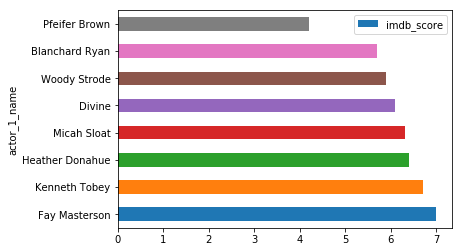

In [26]:
actorsHorror500 = horror500g.sort_values(by = 'imdb_score', ascending = False)
actorsHorror500.plot(x ='actor_1_name', y ='imdb_score', kind ='barh') 

We need to also look at the Facebook likes of these actors as most of them get reasonably good IMDB scores on their movies.

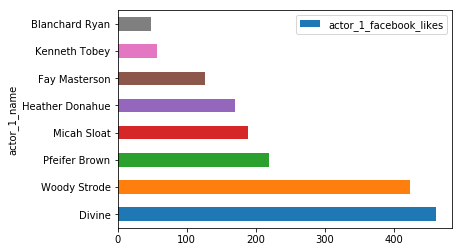

In [27]:
actorsHorror500 = horror500g.sort_values(by = 'actor_1_facebook_likes', ascending = False)
actorsHorror500.plot(x = 'actor_1_name', y = 'actor_1_facebook_likes', kind ='barh') 

IMDB scores and Facebook likes don't correlate much but it would be wise to select someone who has a good IMDB score and good amount of likes on Facebook therefore **Divine** would have been a good choice for leading actor.

### 4.Hypothesis Testing

#### Hypothesis Testing: genres  -  profit

- h0 : The genre will have a bad impact resulting in less profit
- h1 : The genre will have a good impact resulting in more profit


In [28]:
from scipy.stats import t,norm

gM = df.groupby('genres')['profit'].mean()  #mean of genre
gC = df.groupby('genres')['profit'].count() #count of genre
gSTD = df.groupby('genres')['profit'].std() #std of genre

p = (gM['Horror']) / (gSTD['Horror'] / np.sqrt(gC['Horror']))
p_value = (1 - t.cdf(p,gC['Horror']))

if p_value > 0.1:
    print("The p_value is ", p_value, " and h1 is rejected. Horror genre is not a good investment.")
else:
    print("The p_value is ", p_value, " and h0 is rejected. Horror genre is a good investment.")

The p_value is  0.00010532443846278383  and h0 is rejected. Horror genre is a good investment.


### 5.Decision

The main goal as discussed by the CEO of SussexBudgetProductions, is to produce a new movie with a budget of £500000 that would ensure a good return profit. 

As it can be seen from the dataset, there are not enough entries for movies that have budget of around or below £500000. Therefore there is not enough data to support the claims that we are to make fully but with the data given we can see that **Horror** is the best genre based on profit returns on movies within our budget. As our hypothesis testing on Horror movies ensured, Horror has a good probability of having a good profit overall.

For directors we can choose between **Larry Blamire** and **Oren Peli** which both produced good horror movies within our budget requirements based on their IMDB scores and Facebook likes. 

For our leading actor we can see that **Divine** is the best actor for horror movies that are within budget restrictions based on the IMDB score and Facebook likes. It would be wise to use **Micah Sloat** as our secondary actor as he has exceptional IMDB score on his horror movie but and also has good interactions with fans on Facebook with a good amount of likes.